In [1]:
import torch
import torch.optim as optim
from torchsummary import summary
import matplotlib.pyplot as plt

from utils import get_transforms
from utils import download_and_get_data
from model import Net, train, test

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")
device

CUDA Available? False


device(type='cpu')

In [3]:

train_transforms = get_transforms(train=True)
test_transforms = get_transforms(train=False)

In [4]:

train_data = download_and_get_data(train=True)
test_data = download_and_get_data(train=False)

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

torch.Size([512, 1, 28, 28]) torch.Size([512])


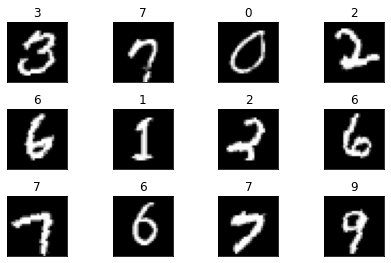

In [6]:


batch_data, batch_label = next(iter(train_loader)) 
print(batch_data.shape,batch_label.shape)
fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [7]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [8]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  test(model, device, test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.8707 Batch_id=117 Accuracy=40.82: 100%|██████████| 118/118 [02:19<00:00,  1.18s/it]


Test set: Average loss: 0.8221, Accuracy: 7265/10000 (72.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2559 Batch_id=117 Accuracy=89.37: 100%|██████████| 118/118 [02:53<00:00,  1.47s/it]


Test set: Average loss: 0.1362, Accuracy: 9595/10000 (95.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0998 Batch_id=117 Accuracy=95.59: 100%|██████████| 118/118 [03:30<00:00,  1.79s/it]


Test set: Average loss: 0.0702, Accuracy: 9789/10000 (97.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1330 Batch_id=117 Accuracy=96.92: 100%|██████████| 118/118 [03:09<00:00,  1.61s/it]


Test set: Average loss: 0.0592, Accuracy: 9816/10000 (98.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1288 Batch_id=117 Accuracy=97.42: 100%|██████████| 118/118 [03:09<00:00,  1.60s/it]


Test set: Average loss: 0.0455, Accuracy: 9859/10000 (98.59%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0672 Batch_id=117 Accuracy=97.66: 100%|██████████| 118/118 [02:58<00:00,  1.51s/it]


Test set: Average loss: 0.0441, Accuracy: 9854/10000 (98.54%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0508 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [03:17<00:00,  1.67s/it]


Test set: Average loss: 0.0329, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0136 Batch_id=117 Accuracy=98.21: 100%|██████████| 118/118 [03:02<00:00,  1.54s/it]


Test set: Average loss: 0.0326, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0629 Batch_id=117 Accuracy=98.40: 100%|██████████| 118/118 [02:42<00:00,  1.37s/it]


Test set: Average loss: 0.0292, Accuracy: 9903/10000 (99.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0690 Batch_id=117 Accuracy=98.43: 100%|██████████| 118/118 [02:37<00:00,  1.34s/it]


Test set: Average loss: 0.0289, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.2606 Batch_id=117 Accuracy=98.57: 100%|██████████| 118/118 [03:00<00:00,  1.53s/it]


Test set: Average loss: 0.0279, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0434 Batch_id=117 Accuracy=98.65: 100%|██████████| 118/118 [02:53<00:00,  1.47s/it]


Test set: Average loss: 0.0322, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0112 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [03:30<00:00,  1.79s/it]


Test set: Average loss: 0.0262, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0507 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [03:29<00:00,  1.78s/it]


Test set: Average loss: 0.0258, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0221 Batch_id=117 Accuracy=98.85: 100%|██████████| 118/118 [02:42<00:00,  1.37s/it]


Test set: Average loss: 0.0265, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0274 Batch_id=117 Accuracy=99.10: 100%|██████████| 118/118 [02:56<00:00,  1.50s/it]


Test set: Average loss: 0.0212, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0383 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [02:48<00:00,  1.42s/it]


Test set: Average loss: 0.0206, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0084 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [02:35<00:00,  1.32s/it]


Test set: Average loss: 0.0211, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.1060 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [02:56<00:00,  1.50s/it]


Test set: Average loss: 0.0208, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0047 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [03:09<00:00,  1.61s/it]


Test set: Average loss: 0.0204, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
